In [18]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

In [3]:
fashion = keras.datasets.fashion_mnist
#deve-se perceber que os dados de fashion já estão resizados para 28x28
(train_images,train_labels),(test_images,test_labels) = fashion.load_data()

In [4]:
class_names = ['Camiseta','Calça','Suéter','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota'] #cria nome para cada label do banco de dados

In [5]:
print(train_images.shape) #mostra a quantidade de itens, e o formato
print(train_labels) #mostra os labels
print(len(train_labels)) #mostra a quantidade de labels de treino
print(len(test_labels))  #mostra a quantidade de labels de teste
#dessa forma 6k para teste, 1k para treino

(60000, 28, 28)
[9 0 0 ... 3 0 5]
60000
10000


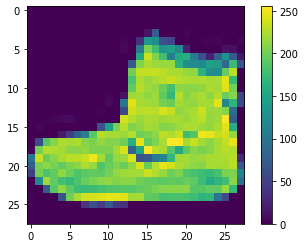

In [6]:
#matplotlib é bugado com virtualenviroments, pode-se omitir isso em outros notebooks.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#deve-se perceber que os valores dos pixels vao de 0 até 255, ou seja, 256 possíveis valores, que sao todos os tons de RGB

In [7]:
train_images = train_images/255.0 #pq tem que ser 255???
test_images = test_images/255.0 #de qual maneira isso é uma escalação?

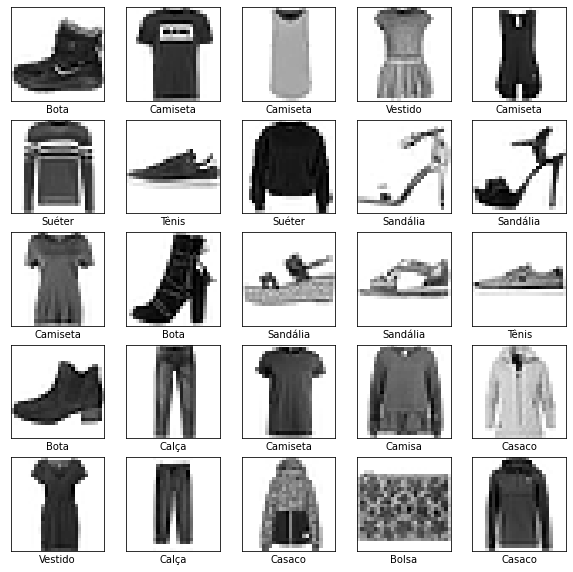

In [8]:
plt.figure(figsize=(10,10)) #cria uma nova figura.
for i in range(25):
    plt.subplot(5,5,i+1) #(linha, coluna) cria um novo eixo dentro da figura
    plt.xticks([]) #sem parametros oculta os ticks de x e y crescentes
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Criando o modelo de rede neural sequencial


In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation = 'relu')) #camada densa de 128 neurônios.
model.add(keras.layers.Dense(10, activation = 'softmax'))

**Na linha 2**, com o método **Flatten**, transformamos um array que tinha como elementos imagens bidimensionais (28x28) num array unidimensional de 784 pixels.
Dessa forma, cada elemento do array unidimensional será uma lista de valores de cada um dos 784 pixels de uma única imagem.


**Na linha 3**, com o método **Dense**, criamos uma camada neural que usa uma função de *retificação de unidade linear* para ativação. Se o valor for negativo ela retorna zero, e se for positivo ela retorna o próprio número. É uma boa função para redes neurais com um grande número de camadas pois ela consegue resolver o problema do gradiente que ocorre com a tanh e com a sigmóide.


**Na linha 4**, com o método **Dense**, criamos uma camada neural cuja função de ativação é a *softmax*. Ela retorna um array de dez probabilidade. A soma de todas as probabilidades resulta em um. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das dez classes disponíveis.

### Então, para resumir:
Alimentamos a rede neural com um array bidimensional que é transformado em unidimensional e depois passa por duas funções que no fim dizem em cada nó qual a probabilidade desta imagem ser a daquela classe.


## Um pouco mais sobre funções de ativação:
A maneira mais fácil de treinar uma rede neural é com uma função linear, mas ela é incapaz de suportar estruturas complexas de dados. Dessa forma, as funções de ativação não lineares são preferidas pois são capaz de suportar tais estruturas. Usam-se as funções tangente hiperbólica e sigmóide pois não são lineares e transmitem o poder do gradiente por toda rede. 

Primeiro usou-se a função sigmóide, depois a hiperbólica pois esta performa melhor, porém, elas sofrem com saturação nas extremidades: somente no meio acontece algum tipo de mudança. Tal condição é a precursora de um erro que se propaga e infecta o resultado final.

Então, para treinar uma rede de *aprendizado profundo* uma função que age como linear mas não é linear faz-se necessária.

[Aqui um grafico legal com as mais comuns ativações](https://pyimagesearch.com/wp-content/uploads/2018/12/keras_conv2d_activation_functions.png)

# Agora, vamos treinar o modelo de rede neural

In [10]:
model.compile(optimizer='adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

## Porém, antes uma explicação:
Antes de treinarmos a rede, precisamos compilar. E existem alguns parâmetros que são importantes para que consigamos a melhor performance. São as opções de otimização, de perda e de métricas.

1. Otimização: é uma função que define qual algoritmo vai ser usado para ajustar os pesos usados nas camadas.
2. Perda: é uma função escolhida que calcula quanto é o erro de predição da rede neural, quanto menor for o resultado dela, melhor.
3. Métricas: usamos ela para medir a acurácia e ver qual fração das imagens que foi classificada corretamente.

In [11]:
model.fit(train_images,train_labels, epochs=10) #input, targets, repetitions 

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5000 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3757 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3400 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3163 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2979 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2827 - accuracy: 0.8944
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2712 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2604 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2494 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.243

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(f'Test accuracy: {test_acc*100:.4}%')

313/313 - 0s - loss: 0.3369 - accuracy: 0.8835
Test accuracy: 88.35%


# Estudo sobre predições.

In [13]:
predictions = model.predict(test_images)
a = np.argmax(predictions)
print(predictions[a]) #imagem que teve maior taxa de acerto (?)
print(np.argmax(predictions[a]))
best_label = np.argmax(predictions[a])

print(f'Nosso modelo acha que a imagem {a} é: {class_names[best_label]}')
print(f'A classificação real da imagem é: {class_names[test_labels[a]]}')


[3.6869061e-08 7.7395541e-11 7.6767724e-12 8.4609874e-13 2.3130736e-10
 9.4055080e-01 3.8865147e-11 5.9278905e-02 1.8747290e-09 1.7033301e-04]
5
Nosso modelo acha que a imagem 21 é: Sandália
A classificação real da imagem é: Sandália


# Plotagem de um gráfico para visualização de predição de entre 10 classes.
Veremos como o modelo se comportará dada uma imagem

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array,true_label,img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array) #retiramos a label com maior porcentagem de acerto
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label],
                                  color = color))


In [15]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks(range(10),class_names,rotation = 90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array,color='#777979')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

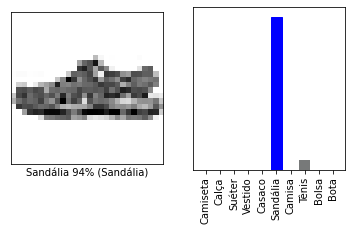

In [16]:
i = a
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
#até aqui vemos a imagem analisada e sua porcentagem de acerto  e o valor real
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
#plt.xlabel()
plt.show()

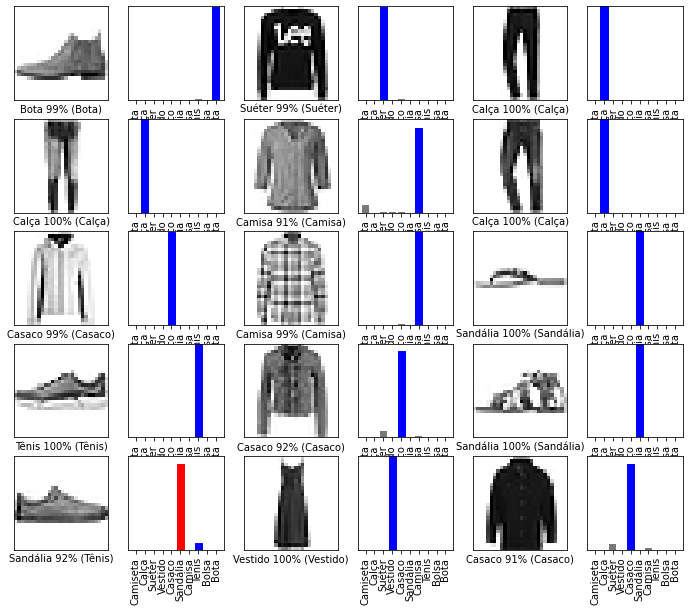

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=((2*2*num_cols),2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()

# FIM
Com isso, terminamos nosso hello_world.fit() :)